# K Means Algorithm

Luiz Felipe Raveduti Zafiro - RA: 120513 -
Artificial Intelligence - Federal University of São Paulo (Unifesp) - 20

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

## Datasets

In [3]:
# Loading data sets

df_aggregation = pd.read_csv('./Datasets/aggregation.txt', sep='\t', header=None)
df_flame = pd.read_csv('./Datasets/flame.txt', sep='\t', header=None)
df_d31 = pd.read_csv('./Datasets/d31.txt', sep='\t', header=None)
df_pathbased = pd.read_csv('./Datasets/pathbased.txt', sep='\t', header=None)

# All data sets have the same form and the same dataframe structure
df_aggregation.head()

,0,1,2
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2


In [4]:
# Scaling values to 0-1 range

scl = MinMaxScaler()

# Aggregation
scl.fit(df_aggregation[[0]])
df_aggregation[0] = scl.transform(df_aggregation[[0]])
scl.fit(df_aggregation[[1]])
df_aggregation[1] = scl.transform(df_aggregation[[1]])

# Flame
scl.fit(df_flame[[0]])
df_flame[0] = scl.transform(df_flame[[0]])
scl.fit(df_flame[[1]])
df_flame[1] = scl.transform(df_flame[[1]])

# D31
scl.fit(df_d31[[0]])
df_d31[0] = scl.transform(df_d31[[0]])
scl.fit(df_d31[[1]])
df_d31[1] = scl.transform(df_d31[[1]])

# Pathbased
scl.fit(df_pathbased[[0]])
df_pathbased[0] = scl.transform(df_pathbased[[0]])
scl.fit(df_pathbased[[1]])
df_pathbased[1] = scl.transform(df_pathbased[[1]])

df_aggregation.head()

,0,1,2
0,0.367470,0.981618,2
1,0.347892,0.941176,2
2,0.334337,0.970588,2
3,0.325301,0.987132,2
4,0.313253,0.959559,2


<Figure size 432x288 with 0 Axes>

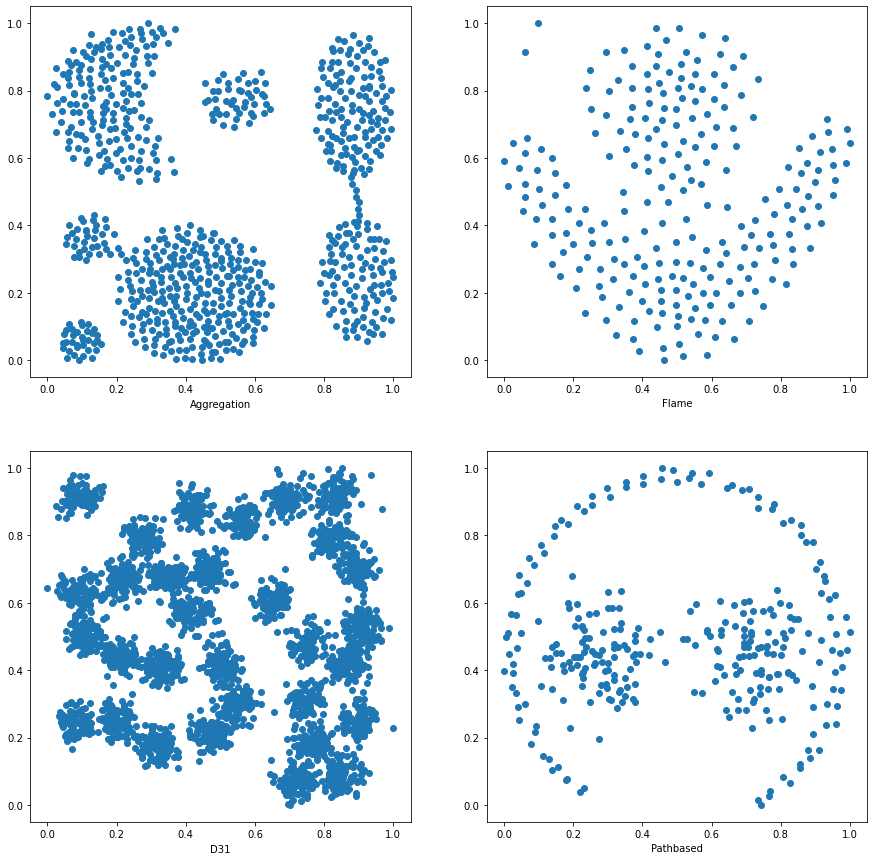

In [5]:
# Data sets visualization

f = plt.figure()
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
axes[0][0].scatter(df_aggregation[0], df_aggregation[1])
axes[0][0].set_xlabel('Aggregation', labelpad = 5)

axes[0][1].scatter(df_flame[0], df_flame[1])
axes[0][1].set_xlabel('Flame')

axes[1][0].scatter(df_d31[0], df_d31[1])
axes[1][0].set_xlabel('D31', labelpad = 5)

axes[1][1].scatter(df_pathbased[0], df_pathbased[1])
axes[1][1].set_xlabel('Pathbased')

plt.show()

## Elbow Method

In [6]:
# We are using elbow method to find the best k for each dataset

# The ranges are the values of k that will be tested
aggregation_range = range(1, 15)
flame_range = range(1, 15)
d31_range = range(1, 40)
pathbased_range = range(1, 15)

# The sum of squares error (given by sklearn) of each k for each dataset
s_aggregation = []
s_flame = []
s_d31 = []
s_pathbased = []

# Executes all data sets tests
for i in aggregation_range:
    model = KMeans(n_clusters=i)
    model.fit(df_aggregation[[0, 1]])
    # The inertia_ is the sum of squares error calculates in the model
    s_aggregation.append(model.inertia_)
    
for i in flame_range:
    model = KMeans(n_clusters=i)
    model.fit(df_flame[[0, 1]])
    # The inertia_ is the sum of squares error calculates in the model
    s_flame.append(model.inertia_)
    
for i in d31_range:
    model = KMeans(n_clusters=i)
    model.fit(df_d31[[0, 1]])
    # The inertia_ is the sum of squares error calculates in the model
    s_d31.append(model.inertia_)
    
for i in pathbased_range:
    model = KMeans(n_clusters=i)
    model.fit(df_pathbased[[0, 1]])
    # The inertia_ is the sum of squares error calculates in the model
    s_pathbased.append(model.inertia_)

<Figure size 432x288 with 0 Axes>

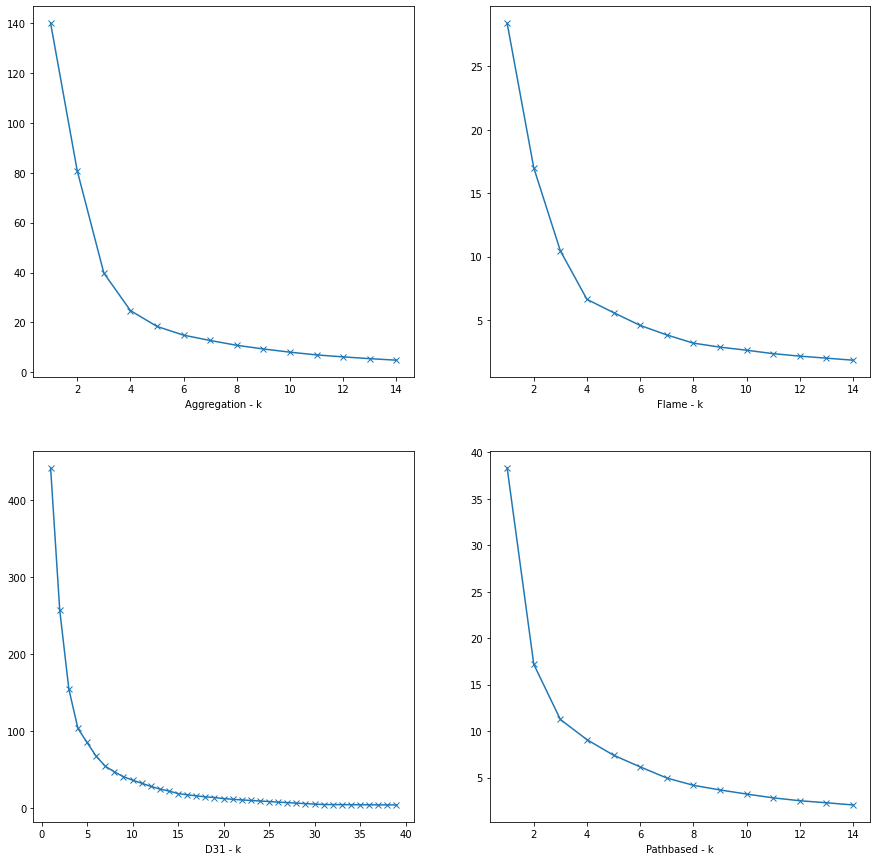

In [7]:
# Plot all elbow graphs

f = plt.figure()
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
axes[0][0].set_xlabel('Aggregation - k', labelpad = 5)
axes[0][0].plot(aggregation_range, s_aggregation, 'x-')

axes[0][1].set_xlabel('Flame - k', labelpad = 5)
axes[0][1].plot(flame_range, s_flame, 'x-')

axes[1][0].set_xlabel('D31 - k', labelpad = 5)
axes[1][0].plot(d31_range, s_d31, 'x-')

axes[1][1].set_xlabel('Pathbased - k', labelpad = 5)
axes[1][1].plot(pathbased_range, s_pathbased, 'x-')

plt.show()

We found that a good value of k for for each dataset is:
aggregation -> k = 7,
flame -> k = 4,
d31 -> k = 31,
pathbased -> k = 3

## Checking Results

In [8]:
# Predict for each dataset

# Cluster Numbers
cl_a = 7
cl_f = 4
cl_d = 31
cl_p = 3

# Aggregation
model = KMeans(n_clusters=cl_a)
agg_predict = model.fit_predict(df_aggregation[[0,1]])
df_aggregation['pred'] = agg_predict

# Flame
model = KMeans(n_clusters=cl_f)
fl_predict = model.fit_predict(df_flame[[0,1]])
df_flame['pred'] = fl_predict

# D31
model = KMeans(n_clusters=cl_d)
d31_predict = model.fit_predict(df_d31[[0,1]])
df_d31['pred'] = d31_predict

# Pathbased
model = KMeans(n_clusters=cl_p)
path_predict = model.fit_predict(df_pathbased[[0,1]])
df_pathbased['pred'] = path_predict

df_pathbased.head()

,0,1,2,pred
0,0.231041,0.049822,1,1
1,0.220459,0.037367,1,1
2,0.181658,0.076512,1,1
3,0.179894,0.074733,1,1
4,0.156966,0.112100,1,1


<Figure size 432x288 with 0 Axes>

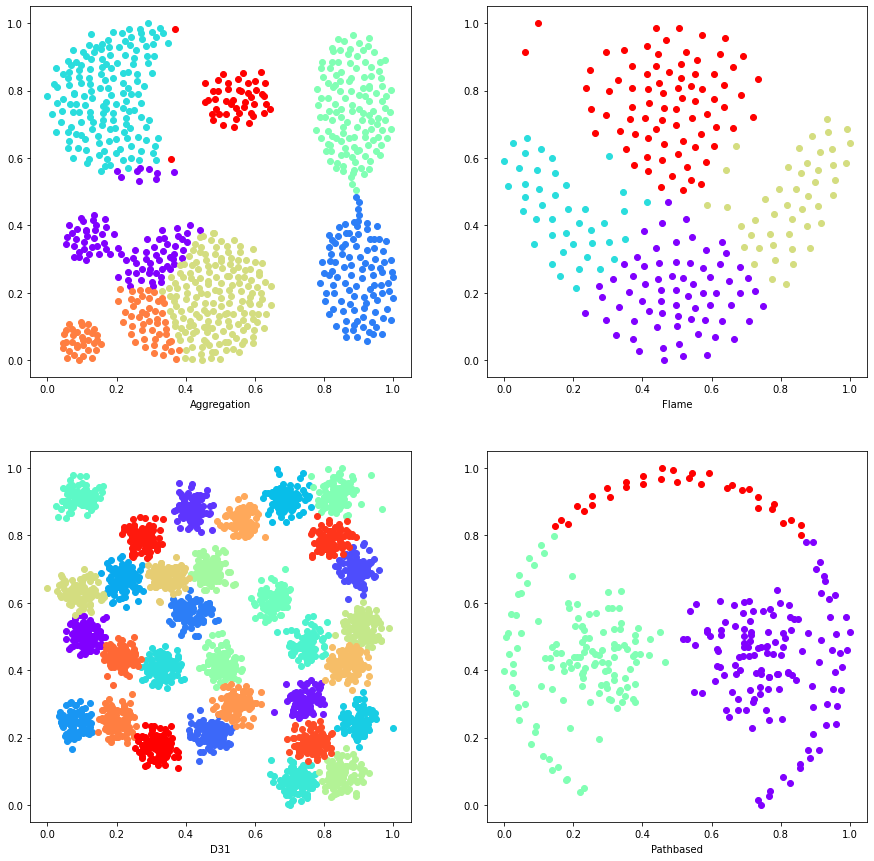

In [9]:
# Results visualization

from matplotlib.pyplot import cm

f = plt.figure()
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

# Aggregation
colors = iter(cm.rainbow(np.linspace(0,1,cl_a)))
for i in range(cl_a):
    df_a = df_aggregation[df_aggregation['pred']==i]
    axes[0][0].scatter(df_a[0], df_a[1], color=next(colors))
axes[0][0].set_xlabel('Aggregation', labelpad = 5)

# Flame
colors = iter(cm.rainbow(np.linspace(0,1,cl_f)))
for i in range(cl_f):
    df_a = df_flame[df_flame['pred']==i]
    axes[0][1].scatter(df_a[0], df_a[1], color=next(colors))
axes[0][1].set_xlabel('Flame', labelpad = 5)

# D31
colors = iter(cm.rainbow(np.linspace(0,1,cl_d)))
for i in range(cl_d):
    df_a = df_d31[df_d31['pred']==i]
    axes[1][0].scatter(df_a[0], df_a[1], color=next(colors))
axes[1][0].set_xlabel('D31', labelpad = 5)

# Pathbased
colors = iter(cm.rainbow(np.linspace(0,1,cl_p)))
for i in range(cl_p):
    df_a = df_pathbased[df_pathbased['pred']==i]
    axes[1][1].scatter(df_a[0], df_a[1], color=next(colors))
axes[1][1].set_xlabel('Pathbased', labelpad = 5)

plt.show()